# **Import the Libraries**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde, skew, kurtosis

# For exploring missing values
import missingno as msno

# **Data Processing**

In [44]:
# import the data/train.csv file
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train = train.set_index('Id')
test = test.set_index('Id') 
train_cleaned = train.copy()

print(train.shape)
print(test.shape)
print(train_cleaned.shape)

(1460, 80)
(1459, 79)
(1460, 80)


In [45]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The target variable is `SalePrice`. We have 79 features in the dataset by removing the columns `ID`

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## **Target Variable Analysis**

In this section we explore the target variable `SalePrice` and its distribution, identifying potential outliers and deciding how to handle them.

### **Descriptive Statistics**

In [47]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### **Interpretation:**

This statistical summary provides key insights into the distribution of the `SalePrice` variable:

- **Count $= 1460$**: There are 1460 observations (rows) in the dataset for `SalePrice`, indicating no missing values.

- **Mean $= 180,921.20$**: The average sale price of houses is approximately $180,921.

- **Standard Deviation $= 79,442.50$**: The typical deviation of house prices from the mean is $79,442, indicating significant variability.

- **Minimum $= 34,900$**: The lowest house price in the dataset is $34,900.

- **25th Percentile $= 129,975$**: 25% of house prices are below $129,975.

- **Median/50th Percentile $= 163,000$**: The median house price is $163,000, showing that half of the houses are priced below this value. This is lower than the mean, confirming the right-skewness.

- **75th Percentile $= 214,000$**: 75% of house prices are below $214,000.

- **Maximum $= 755,000$**: The highest house price in the dataset is $755,000, indicating potential outliers in the high price range.

#### **Key Observations:**
- The mean is greater than the median, suggesting a **right-skewed distribution** of house prices.

- The large range (from $34,900 to $755,000) and high standard deviation suggest significant variability in housing prices.

- Potential outliers exist in the upper range (e.g., max value of $755,000), which may need attention during preprocessing.

### **Distribution**

We will plot the distribution of `SalePrice` and calculate the skewness and kurtosis of the data. 

We will also use Kernel Density Estimation (KDE) to estimate the probability density function of the data.

#### **Brief Theory: Kernel Density Estimation (KDE)**

Kernel Density Estimation (KDE) is a non-parametric method to estimate the probability density function (PDF) of a dataset. 
It smooths the histogram by placing a small, continuous kernel (e.g., Gaussian) at each data point.

#### **Formula**
$$
f(x) = \frac{1}{n \times h}\sum(\frac{K((x - x_i)}{h})
$$

Where:
- $n$: Number of data points
- $h$: Bandwidth (controls smoothness)
- $K$: Kernel function (e.g., Gaussian kernel)

In [48]:
# Calculate KDE for SalePrice
kde = gaussian_kde(train['SalePrice'])
x_vals = np.linspace(train['SalePrice'].min(), train['SalePrice'].max(), 1000)
kde_vals = kde(x_vals)

# Create the histogram with proportion normalization
fig = px.histogram(train, 
                   x='SalePrice', 
                   nbins=100, 
                   title='SalePrice Distribution with Density',
                   labels={'SalePrice': 'Sale Price'},
                   template='plotly_white',
                   histnorm='probability density')  # Normalize to proportion

fig.update_traces(marker_color='blue', opacity=0.75)

# Add the density curve
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=kde_vals,
        mode='lines',
        line=dict(color='black', width=2),
        name='Density Estimation'
    )
)

fig.update_layout(
    yaxis_title='Density',
    xaxis_title='Sale Price',
    showlegend=True
)

fig.show()

In [49]:
# Calculate skewness and kurtosis of the SalePrice
saleprice_skewness = skew(train['SalePrice'])
saleprice_kurtosis = kurtosis(train['SalePrice'])

print(f"Skewness: {saleprice_skewness}")
print(f"Kurtosis: {saleprice_kurtosis}")

Skewness: 1.880940746034036
Kurtosis: 6.509812011089439


### **Definitions of Skewness and Kurtosis**

#### **1. Skewness**
Skewness quantifies the asymmetry of a distribution around its mean. It is mathematically defined as:

$$
Skewness = \frac{\frac{1}{n}sum_{i=1}^n (x_i -\mu)^3}{\sigma^3}
$$

Where:
- $n$: Number of data points
- $x_i$: Individual data point
- $\mu$: Mean of the dataset
- $\sigma$: Standard deviation of the dataset

**Interpretation**:
  - **Skewness > 0**: The distribution is positively skewed (longer tail on the right).
  - **Skewness < 0**: The distribution is negatively skewed (longer tail on the left).
  - **Skewness = 0**: The distribution is symmetric.

**Significance in Machine Learning**:
  - A highly skewed target variable may require transformations (e.g., log transformation) to improve model performance.

---

#### **2. Kurtosis**
Kurtosis measures the "tailedness" or the sharpness of the peak of a distribution. It is mathematically defined as:

$$
Kurtosis = \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \mu)^4}{\sigma^4} - 3
$$

Where:
- $n$: Number of data points
- $x_i$: Individual data point
- $\mu$: Mean of the dataset
- $\sigma$: Standard deviation of the dataset
- $-3$ ensures comparison with the normal distribution (which has kurtosis = 3).

**Types**:
  - **Leptokurtic (Kurtosis > 0)**: Distribution has heavy tails and a sharp peak (more outliers).
  - **Mesokurtic (Kurtosis = 0)**: Distribution is similar to the normal distribution.
  - **Platykurtic (Kurtosis < 0)**: Distribution has light tails and a flatter peak.

**Significance in Machine Learning**:
  - High kurtosis indicates extreme values (outliers), which may require special handling to avoid skewing model training.

---

#### **Summary**

- **Skewness** reveals asymmetry, while **kurtosis** highlights the concentration of extreme values.
- Both metrics provide insights into the shape of the data distribution, enabling better preprocessing and model selection.


---
#### **Application to the Dataset:**

**Skewness:**

- Skewness = $ 1.88$: The distribution of SalePrice is highly right-skewed, indicating a long tail with higher-priced houses. 

- A right-skewed distribution can lead to poor model performance because the model struggles to predict extreme values. 

- We will maybe need to apply a transformation to make the distribution more symmetric.

**Kurtosis:**

- Kurtosis = $6.51$: The distribution is leptokurtic, meaning it has a sharper peak and heavier tails compared to a normal distribution. 

- This suggests more extreme values (outliers) in the dataset.

- Outliers can:
    - skew the training process of sensitive models (e.g., linear regression)

    - Overemphasize extreme values in tree-based models (e.g., random forests, XGBoost).

---

#### **Handling Outliers**

To handle outliers, we can:

- Removing extreme outliers if they are errors or irrelevant.

- Applying robust models that are less sensitive to outliers (e.g., gradient boosting, robust regression).

In [50]:
fig = px.box(train, y='SalePrice', title='SalePrice Boxplot',
             labels={'SalePrice': 'Sale Price'},
             template='plotly_white')
fig.update_traces(marker_color='blue')
fig.show()

#### **How to read the SalePrice Boxplot**

- **Median**: The central line in the boxplot represents the median sale price, approximately $200k.

- **Interquartile Range (IQR)**: The box spans the middle 50% of the data, from the 25th percentile to the 75th percentile.

- **Whiskers**: Extend to the non-outlier data points within 1.5 times the IQR.

- **Outliers**: Points above the upper whisker are considered outliers, representing high-priced properties.

#### **Interpretation:**
The boxplot shows a significant number of outliers in the higher price range, confirming the right-skewness of `SalePrice`.

### **Missing Values**

In [51]:
# Check for missing values in SalePrice
missing_values = train['SalePrice'].isnull().sum()
print(f"Missing values in SalePrice: {missing_values}")

Missing values in SalePrice: 0


## **Features Variables Analysis**

### **Proportion of Missing Values**

In [52]:
# Calculate percentage of missing values
missing_percentage = (train.isnull().sum() / len(train)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]

# Convert to DataFrame for visualization
missing_df = missing_percentage.reset_index()
missing_df.columns = ['Variable', 'Missing Percentage']

# Plot the missing values as a vertical bar chart
fig = px.bar(
    missing_df.sort_values(by='Missing Percentage', ascending=True),
    x='Missing Percentage',
    y='Variable',
    orientation='h',
    title='Percentage of Missing Values Per Variable',
    labels={'Missing Percentage': 'Missing Percentage (%)', 'Variable': 'Variable'},
    template='plotly_white'
)

fig.update_layout(xaxis_title="Percentage of Missing Values (%)", yaxis_title="Variables")
fig.show()

#### **Interpretation of Missing Values**

The plot shows the percentage of missing values for variables in the dataset. Key insights include:

1. **High Missingness (Above 40%)**:
   - `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `MasVnrType` and `FirePlaceQu`have a very high percentage of missing values (over 80%). These variables may:
     - Be dropped if deemed uninformative or irrelevant.
     - Have missing values imputed with a new category (e.g., "No Pool" for `PoolQC`).

2. **Moderate Missingness (10%-20%)**:
   - Variables like `LotFrontage` have moderate missing values. Strategies like imputation (e.g., median for `LotFrontage`) may be required.

3. **Low Missingness (<6%)**:
   - Variables such as `GarageType`, `GarageCond`, and basement-related variables (`BsmtQual`, `BsmtExposure`, etc.) have fewer missing values and can be imputed more easily.

#### **Next Steps**
- For variables with high missing percentages, we will evaluate their importance using domain knowledge and feature correlation.

- For moderate to low missingness, we will apply appropriate imputation strategies (e.g., median for numerical, "None" for categorical).

- We will consider removing variables with consistently high missing values if they don't provide significant predictive power.

### **Distribution of missing data**

The missing data can be:
- **partial** or **"item nonresponse"**: for a given individual, only a few values are missing, so some (but not all) variables are unobserved.

- **total** or **"unit nonresponse"**: all variables of a given individual are unobserved.

**Little and Rubin (2019)** Define Three Kinds of Missing Value Distributions:

1. **Univariate Missing Values**:
   If the same individuals have missing values for the same $d < p$ variables.

2. **Monotonic Missing Values**:
   If the variables can be ordered such that, when the observation $y_{ij}$ is missing for the variable $Y_j$, all the following variables for this same individual, $y_{ik}, k > j$, are also missing.

3. **Non-Monotonic or Arbitrary Missing Values**:
   If the missing values are without structure, i.e., they are distributed without any particular structure in the dataset.

#### **`msno.matrix()`**

The `msno.matrix()` plot provides a visual overview of the missing data in the dataset. It allows us to analyze missingness patterns across all variables and observations. This tool helps us understand the structure and distribution of missing data, which is essential for designing effective imputation strategies.

<Axes: >

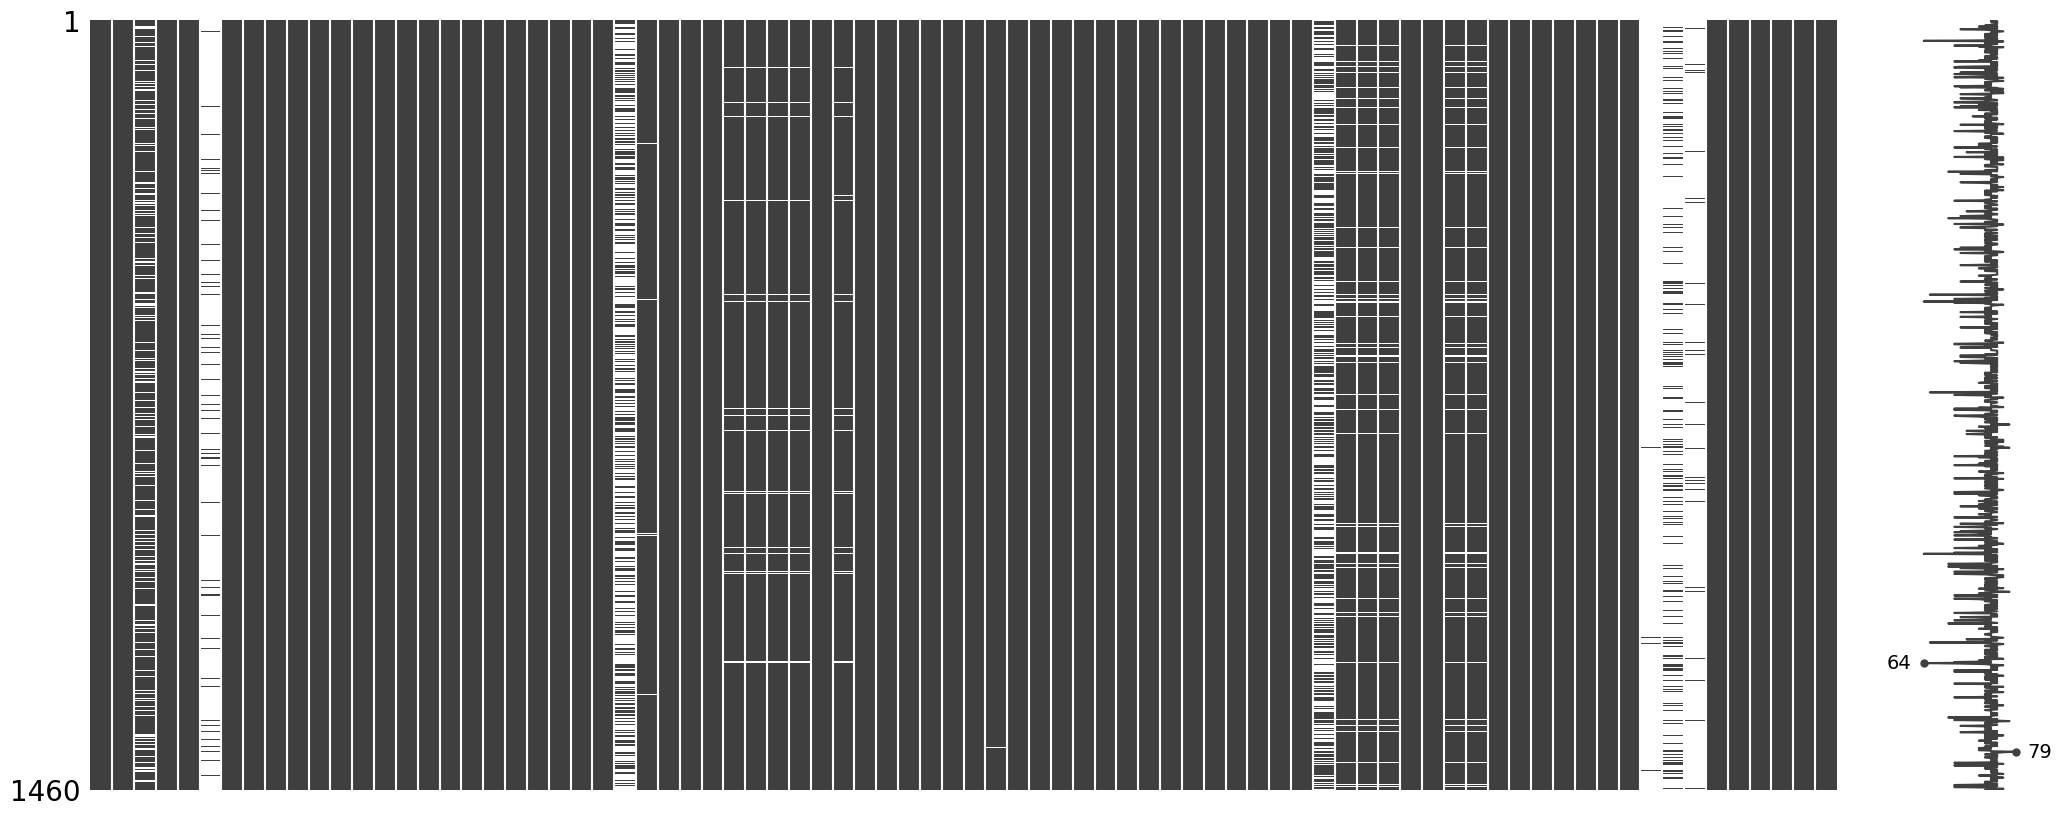

In [53]:
msno.matrix(train)

#### **How to read the Plot**

1. **Columns (Vertical Strips)**:
   - Each column represents a variable in the dataset.
   - Black bars indicate observed (non-missing) values, while white spaces indicate missing values.

2. **Rows (Horizontal Lines)**:
   - Each row corresponds to an individual observation.
   - Gaps in rows show where missing data occurs for specific variables.

3. **Key Observations**:
   - Some variables have significant missingness (e.g., `PoolQC`, `MiscFeature`, `Alley`, `Fence`) with large white spaces in their respective columns.
   - Other variables, such as `LotFrontage` and `GarageType`, show moderate missingness with more sparsely distributed white spaces.
   - Many variables have no missing values at all (fully black columns).

4. **Density Plot on the Side**:
   - The right-hand plot shows the count of non-missing values for each observation.
   - It helps identify rows with missing data across multiple variables.

### **Handle Columns with High Missing Values**

#### **`PoolQC`**: Pool Quality

In [54]:
# Calculate the distribution of the 'PoolQC' feature
poolqc_distribution = train['PoolQC'].value_counts(dropna=False)
poolqc_distribution

PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: count, dtype: int64

In [55]:
# Calculate the distribution of 'PoolArea' with corresponding 'PoolQC'
poolarea_distribution = train.groupby('PoolArea')['PoolQC'].value_counts(dropna=False).reset_index(name='Count')

# Display the table
print(poolarea_distribution)

   PoolArea PoolQC  Count
0         0    NaN   1453
1       480     Gd      1
2       512     Ex      1
3       519     Fa      1
4       555     Ex      1
5       576     Gd      1
6       648     Fa      1
7       738     Gd      1



The missing values (`NaN`) in the `PoolQC` variable occur when the house does not have a pool. 

From the analysis, it appears that there is no clear correlation between `PoolQC` (pool quality) and `PoolArea` (size of the pool). This indicates that the presence or quality of a pool is not systematically tied to the pool's size. 

**Decision**: 
We will retain the `PoolQC` variable for further analysis and fill its missing values with `"No"` to indicate the absence of a pool.

In [56]:
# Replace NaN values in 'PoolQC' with "No"
train_cleaned['PoolQC'] = train_cleaned['PoolQC'].fillna("No")

#### **`MiscFeature`**: Miscellaneous Feature

MiscFeature: Miscellaneous feature not covered in other categories
- `Elev`: Elevator
- `Gar2`:	2nd Garage (if not described in garage section)
- `Othr`:	Other
- `Shed`: Shed (over 100 SF)
- `TenC`:	Tennis Court
- `NA`: None

In [57]:
# Calculate the distribution
miscfeature_distribution = train['MiscFeature'].value_counts(dropna=False)
miscfeature_distribution

MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

In [58]:
# Calculate the distribution of 'MiscVal' with corresponding 'MiscFeature'
miscval_distribution = train.groupby('MiscVal')['MiscFeature'].value_counts(dropna=False).reset_index(name='Count')

# Display the table
print(miscval_distribution)

    MiscVal MiscFeature  Count
0         0         NaN   1406
1         0        Othr      1
2         0        Shed      1
3        54        Shed      1
4       350        Shed      1
5       400        Shed     11
6       450        Shed      4
7       480        Shed      2
8       500        Shed      8
9       560        Shed      1
10      600        Shed      4
11      620        Shed      1
12      700        Shed      5
13      800        Shed      1
14     1150        Shed      1
15     1200        Shed      2
16     1300        Shed      1
17     1400        Shed      1
18     2000        Shed      3
19     2000        TenC      1
20     2500        Shed      1
21     3500        Othr      1
22     8300        Gar2      1
23    15500        Gar2      1


We assume a correlation, or even collinearity, between the type of miscellaneous feature (`MiscFeature`) and its corresponding value (`MiscVal`). 

**Decision**: To avoid redundancy, we will retain only the `MiscVal` variable, which represents the monetary value of the miscellaneous feature, and drop `MiscFeature`.

In [59]:
train_cleaned.drop(columns='MiscFeature', inplace=True)

In [60]:
print(train.shape)
print(train_cleaned.shape)

(1460, 80)
(1460, 79)


#### **`Alley`: Type of Alley Access**

Values:
- `Grvl`: Gravel
- `Pave`: Paved
- `Na` : No alley access

In [61]:
alley_distribution = train['Alley'].value_counts(dropna=False)
alley_distribution

Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

Is there a relationship between the type of alley access (`Alley`) and the road access type (`Street`)?

In [62]:
# Create a contingency table to examine the relationship between 'Street' and 'Alley'
street_alley_relationship = pd.crosstab(train['Street'], train['Alley'], normalize='index')

# Display the relationship
print(street_alley_relationship)

Alley       Grvl      Pave
Street                    
Pave    0.549451  0.450549


#### Analysis of `Street` and `Alley`

We observe that there is only one type of street in the dataset: `Pave`. Since the `Street` variable is constant, it provides no useful information for prediction. Therefore, we will remove it from the dataset.

Regarding the `Alley` variable, we will retain it and replace the missing values with `"No"` to indicate the absence of alley access.

In [63]:
train_cleaned.drop(columns='Street', inplace=True)

In [64]:
# Replace NaN values in 'Alley' with "No"
train_cleaned['Alley'] = train_cleaned['Alley'].fillna("No")

In [65]:
print(train.shape)
print(train_cleaned.shape)

(1460, 80)
(1460, 78)


#### **`Fence`: Fence Quality**

- `GdPrv`: Good Privacy

- `MnPrv`: Minimum Privacy

- `GdWo`: Good Wood

- `MnWw`: Minimum Wood/Wire

- `NA`: No Fence

In [66]:
fence_distribution = train['Fence'].value_counts(dropna=False)
fence_distribution

Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

We will replace the missing values in the `Fence` variable with `"No"` to indicate the absence of a fence.

In [67]:
# Replace NaN values in 'Fence' with "No"
train_cleaned['Fence'] = train_cleaned['Fence'].fillna("No")

#### **`MasVnrType`**: Masonry Veneer Type

- `BrkCmn`: Brick Common

- `BrkFace`: Brick Face

- `CBlock`: Cinder Block

- `None`: None

- `Stone`: Stone

In [68]:
masvnrtype_distribution = train['MasVnrType'].value_counts(dropna=False)
masvnrtype_distribution

MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

We will replace the missing values in the `MasVnrType` variable with `"No"` to indicate the absence of masonry veneer.

In [69]:
train_cleaned['MasVnrType'] = train_cleaned['MasVnrType'].fillna("No")

In [70]:
# Filter rows where 'MasVnrArea' is missing
missing_masvnrarea = train_cleaned[train_cleaned['MasVnrArea'].isnull()]

# Display the 'MasVnrType' and 'MasVnrArea' columns for these rows
print(missing_masvnrarea[['MasVnrType', 'MasVnrArea']])

     MasVnrType  MasVnrArea
Id                         
235          No         NaN
530          No         NaN
651          No         NaN
937          No         NaN
974          No         NaN
978          No         NaN
1244         No         NaN
1279         No         NaN


For the Nan in MasVnrArea is when there is no masonry, so we will replace it with 0.

In [71]:
# Replace missing values in 'MasVnrArea' with 0
train_cleaned['MasVnrArea'] = train_cleaned['MasVnrArea'].fillna(0)

#### Is there a relationship between `MasVnrType` and `MasVnrArea`?

In [72]:
# Plot the relationship using a box plot
fig = px.box(
    train_cleaned,
    x='MasVnrType',
    y='MasVnrArea',
    title='Relationship Between MasVnrType and MasVnrArea',
    labels={'MasVnrType': 'Masonry Veneer Type', 'MasVnrArea': 'Masonry Veneer Area (sq ft)'},
    template='plotly_white'
)

fig.update_layout(xaxis_title='Masonry Veneer Type', yaxis_title='Masonry Veneer Area (sq ft)')
fig.show()

**Decision on `MasVnrType` and `MasVnrArea`**

We will retain both `MasVnrType` and `MasVnrArea` as they provide complementary information. The type (`MasVnrType`) and area (`MasVnrArea`) of masonry veneer are correlated and together contribute to understanding the property features.

#### **`FireplaceQu`: Fireplace Quality**

- `Ex`: Excellent - Exceptional Masonry Fireplace

- `Gd`: Good - Masonry Fireplace in main level

- `TA`: Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement

- `Fa`: Fair - Prefabricated Fireplace in basement

- `Po`: Poor - Ben Franklin Stove

- `NA`: No Fireplace
		

In [73]:
fireplacequ_distribution = train['FireplaceQu'].value_counts(dropna=False)
fireplacequ_distribution

FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64

In [74]:
# Create a cross-tabulation to see the relationship between 'Fireplaces' and 'FireplaceQu'
fireplace_relationship = pd.crosstab(train['Fireplaces'], train['FireplaceQu'], normalize='index')

# Display the table
print(fireplace_relationship)

FireplaceQu        Ex        Fa        Gd        Po        TA
Fireplaces                                                   
1            0.029231  0.043077  0.498462  0.030769  0.398462
2            0.034783  0.034783  0.469565  0.000000  0.460870
3            0.200000  0.200000  0.400000  0.000000  0.200000


**Key Observations:**

- Gd (Good) and TA (Typical/Average) are the most common ratings across all numbers of fireplaces.

- Houses with multiple fireplaces tend to have higher-quality ratings (Ex increases for 3 fireplaces), suggesting that homes with more fireplaces are likely higher-value properties.

- Poor quality (Po) fireplaces are rare overall and completely absent in houses with 2 or 3 fireplaces.

**Interpretation:**

- There is a clear association between the number of fireplaces and the quality of fireplaces, with homes having multiple fireplaces being more likely to have higher-quality ratings.

- This relationship suggests that both variables could provide complementary information for predicting house prices. Consider retaining both variables for further analysis or feature engineering.

**Decision:**

We will compute a new variable to capture the total fireplace quality by summing the individual fireplace quality ratings for each house. This combined variable can provide a more comprehensive measure of fireplace quality, accounting for both the number and quality of fireplaces in a property and avoiding potential multicollinearity issues.

In [75]:
# Map 'FireplaceQu' to numerical scores
quality_mapping = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1,
    "No": 0  # Missing values or no fireplace
}

# Replace NaN in FireplaceQu with 'NA' for consistent mapping
train_cleaned['FireplaceQu'] = train_cleaned['FireplaceQu'].fillna("No")

# Create a new column 'FireplaceQ_core' based on the mapping
train_cleaned['FireplaceQu_Score'] = train_cleaned['FireplaceQu'].map(quality_mapping)

# Create the combined feature: multiply Fireplaces with FireplaceQu_Score
train_cleaned['FireplaceFeature'] = train_cleaned['Fireplaces'] * train_cleaned['FireplaceQu_Score']

# Check the new variable
train_cleaned[['Fireplaces', 'FireplaceQu', 'FireplaceQu_Score', 'FireplaceFeature']].head()

,Fireplaces,FireplaceQu,FireplaceQu_Score,FireplaceFeature
Id,,,,
1,0,No,0,0
2,1,TA,3,3
3,1,TA,3,3
4,1,Gd,4,4
5,1,TA,3,3


In [76]:
# drop the 'FireplaceQu', 'Fireplaces' and 'FireplaceQu_Score' columns
train_cleaned.drop(columns=['FireplaceQu', 'Fireplaces', 'FireplaceQu_Score'], inplace=True)

In [77]:
print(train.shape)
print(train_cleaned.shape)

(1460, 80)
(1460, 77)


### **Moderate Missingness (10%-20%)**

#### Looking the remaining columns with missing values

In [78]:
# Calculate percentage of missing values
missing_percentage = (train_cleaned.isnull().sum() / len(train_cleaned)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]

# Convert to DataFrame for visualization
missing_df = missing_percentage.reset_index()
missing_df.columns = ['Variable', 'Missing Percentage']

# Plot the missing values as a vertical bar chart
fig = px.bar(
    missing_df.sort_values(by='Missing Percentage', ascending=True),
    x='Missing Percentage',
    y='Variable',
    orientation='h',
    title='Percentage of Missing Values Per Variable',
    labels={'Missing Percentage': 'Missing Percentage (%)', 'Variable': 'Variable'},
    template='plotly_white'
)

fig.update_layout(xaxis_title="Percentage of Missing Values (%)", yaxis_title="Variables")
fig.show()

#### **Heatmap of Missing Value Correlations**

This heatmap shows the correlation between missing values across different variables in the dataset. It helps identify whether the absence of data in one variable is systematically related to missing data in another.

<Axes: >

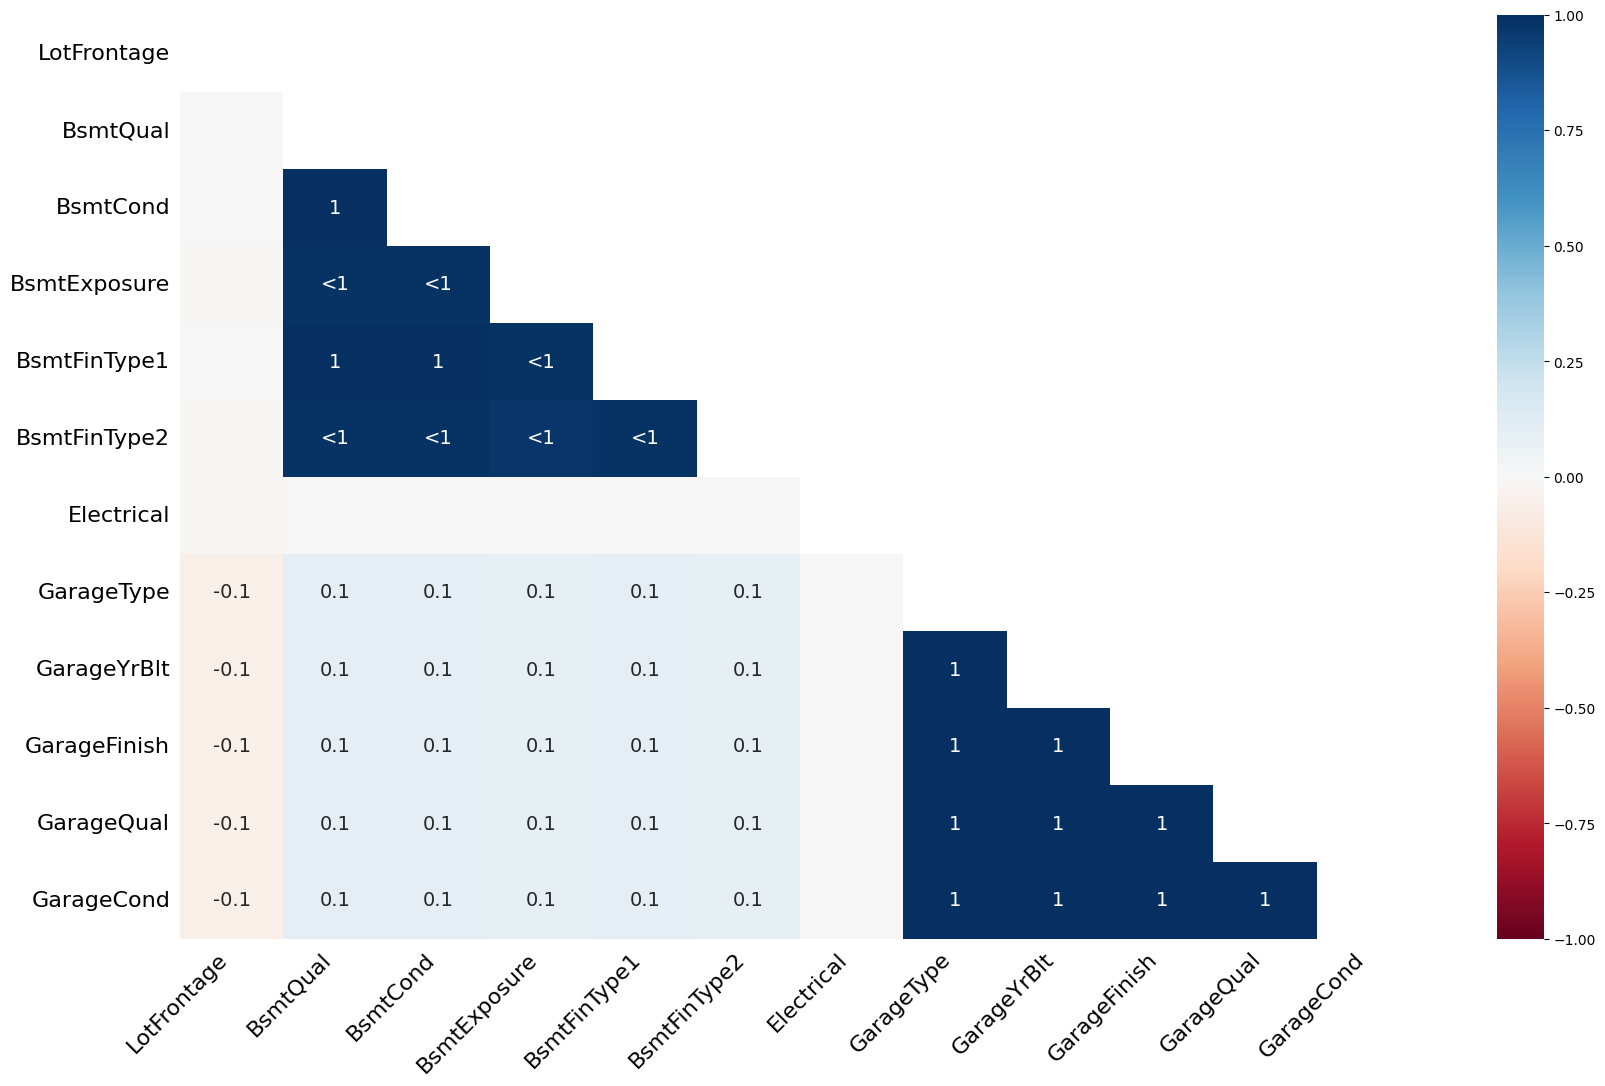

In [79]:
msno.heatmap(train_cleaned)

**Interpretation**

1. **Strong Correlations**:
   - Features related to the basement (`BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`) show a strong correlation (values close to 1). This suggests that missing values in these features occur together, indicating a shared pattern of missingness, likely because some houses lack basements entirely.

   - Similarly, garage-related features (`GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, `GarageCond`) are perfectly correlated, indicating that missing values occur when a house does not have a garage.

2. **Weak or No Correlation**:
   - `LotFrontage` show weak or no correlation with other variables. This implies that the missingness in these features is independent of other variables and may be treated separately (e.g., using imputation).

**Key Insights for Missing Value Processing**

- **Basement and Garage Features**: Correlated missingness suggests these features should be imputed together or treated as groups (e.g., imputing missing values as "No Basement" or "No Garage").

- **Independent Features**: Features like `LotFrontage` can be imputed individually as their missingness does not depend on other variables.

This heatmap provides critical insights into how to handle missing values effectively by identifying patterns and dependencies.

#### **`LotFrontage`: Linear Feet of Street Connected to Property**

In [80]:
# Calculate the proportion of missing values for LotFrontage
missing_proportion = train['LotFrontage'].isnull().sum() / len(train) * 100
print(f"Proportion of missing values for LotFrontage: {missing_proportion:.2f}%")

Proportion of missing values for LotFrontage: 17.74%


In [81]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [82]:
# Calculate KDE for LotFrontage (ignoring missing values)
lotfrontage_data = train['LotFrontage'].dropna()
kde = gaussian_kde(lotfrontage_data)
x_vals = np.linspace(lotfrontage_data.min(), lotfrontage_data.max(), 1000)
kde_vals = kde(x_vals)

# Create the histogram with proportion normalization
fig = px.histogram(train, 
                   x='LotFrontage', 
                   nbins=100, 
                   title='LotFrontage Distribution with Density',
                   labels={'LotFrontage': 'Lot Frontage'},
                   template='plotly_white',
                   histnorm='probability density')  # Normalize to proportion

fig.update_traces(marker_color='blue', opacity=0.75)

# Add the density curve
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=kde_vals,
        mode='lines',
        line=dict(color='black', width=2),
        name='Density Estimation'
    )
)

fig.update_layout(
    yaxis_title='Density',
    xaxis_title='Lot Frontage',
    showlegend=True
)

fig.show()

**Is `LotFrontage` correlated with other features ?**

Understanding whether `LotFrontage` is correlated with other features helps us decide how to handle its missing values. 

If `LotFrontage` has strong relationships with other variables, we can use those features for informed imputation methods, such as regression-based or group-wise imputation. 

This ensures that the missing values are filled in a way that maintains the underlying data structure and relationships, leading to more accurate and reliable predictions in our machine learning models.

In [83]:
numerical_features = train.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Extract correlations involving LotFrontage
lotfrontage_correlation = correlation_matrix['LotFrontage'].sort_values(ascending=False)

# Create a DataFrame for Plotly
correlation_df = lotfrontage_correlation.drop('LotFrontage').reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Plot using Plotly
fig = px.bar(
    correlation_df.sort_values(by='Correlation', ascending=True),
    x='Correlation',
    y='Feature',
    orientation='h',
    title='Correlation of LotFrontage with Other Features',
    labels={'Correlation': 'Correlation Coefficient', 'Feature': 'Features'},
    template='plotly_white'
)

fig.update_layout(xaxis_title="Correlation Coefficient", yaxis_title="Features")
fig.show()

#### **Why Use Group-Wise Imputation for `LotFrontage`?**

**Theory Behind Group-Wise Imputation**

Group-wise imputation leverages the relationships between a feature with missing values and other features that are strongly correlated or contextually relevant. Instead of filling missing values with a global statistic (e.g., mean or median), group-wise imputation calculates a summary statistic (like the median) within specific groups. 

This approach ensures that the imputed values are more representative of the subgroups, leading to better data integrity and model accuracy.

**Why It Works**
- Features such as `LotFrontage` (lot frontage in feet) are correlated with `LotArea` (lot size) and may vary significantly across neighborhoods.

- Imputing based on groupings (e.g., by `Neighborhood`) captures localized variations and relationships, producing more realistic estimates.

**Benefits**
1. **Preserves Relationships**: Maintains the relationship between `LotFrontage` and other features like `LotArea` and `Neighborhood`.

2. **Prevents Bias**: Avoids introducing bias by using a global statistic that may not fit all groups equally.

3. **Improves Model Accuracy**: By imputing values in context, the predictive power of the feature is better preserved.

**Application to `LotFrontage`**

For `LotFrontage`, we will use the median value grouped by `Neighborhood`. The median is robust to outliers and effectively captures the central tendency within each group.

In [84]:
# Ensure missing values in LotFrontage are imputed using group-wise median by Neighborhood
train_cleaned['LotFrontage'] = train_cleaned.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# Verify if there are any remaining missing values
print(f"Remaining missing values in LotFrontage: {train_cleaned['LotFrontage'].isnull().sum()}")

Remaining missing values in LotFrontage: 0


### **Handle `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`**

For all the basement-related variables (`BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`), we will replace the missing values with `"No"` to indicate the absence of a basement.

In [85]:
train_cleaned['BsmtQual'] = train_cleaned['BsmtQual'].fillna("No")
train_cleaned['BsmtCond'] = train_cleaned['BsmtCond'].fillna("No")
train_cleaned['BsmtExposure'] = train_cleaned['BsmtExposure'].fillna("No")
train_cleaned['BsmtFinType1'] = train_cleaned['BsmtFinType1'].fillna("No")
train_cleaned['BsmtFinType2'] = train_cleaned['BsmtFinType2'].fillna("No")

#### **Handle `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, `GarageCond`**

For all the garage-related variables (`GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, `GarageCond`), we will replace the missing values with `"No"` to indicate the absence of a garage.

In [86]:
train_cleaned['GarageType'] = train_cleaned['GarageType'].fillna("No")
train_cleaned['GarageYrBlt'] = train_cleaned['GarageYrBlt'].fillna("No")  
train_cleaned['GarageFinish'] = train_cleaned['GarageFinish'].fillna("No")
train_cleaned['GarageQual'] = train_cleaned['GarageQual'].fillna("No")
train_cleaned['GarageCond'] = train_cleaned['GarageCond'].fillna("No")

#### **Handle `Electrical`**

**Electrical: Electrical system**

- `SBrkr`: Standard Circuit Breakers & Romex

- `FuseA`: Fuse Box over 60 AMP and all Romex wiring (Average)	

- `FuseF`: 60 AMP Fuse Box and mostly Romex wiring (Fair)

- `FuseP`: 60 AMP Fuse Box and mostly knob & tube wiring (poor)

- `Mix`: Mixed

In [87]:
electrical_distribution = train['Electrical'].value_counts(dropna=False)
electrical_distribution

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64

We will replace the missing value in the `Electrical` variable with the most common value, `"SBrkr"`, which stands for Standard Circuit Breakers & Romex. This is a common electrical system type and is likely to be present in most houses.

In [88]:
# Replace missing values in 'Electrical' with the mode
train_cleaned['Electrical'] = train_cleaned['Electrical'].fillna(train_cleaned['Electrical'].mode()[0])

# **Feature Engineering**

In [89]:
df = train_cleaned.copy()

## Quantitative Features

### Identifying Highly Correlated Variable Pairs

In this step, we are identifying pairs of features in the dataset that are highly correlated (correlation > 0.5), excluding the target variable `SalePrice`. This helps us detect potential multicollinearity, which can negatively impact some machine learning models. Here's a breakdown of the process:

1. **Compute Correlation Matrix**:
   - We calculate the correlation matrix for all numeric features in the dataset, excluding the target variable `SalePrice`.

2. **Extract Upper Triangle**:
   - To avoid duplicate pairs (e.g., A-B and B-A) and self-correlations (e.g., A-A), we extract the upper triangle of the correlation matrix.

3. **Filter High Correlations**:
   - We filter pairs of variables where the absolute correlation is greater than 0.5.

4. **Result**:
   - The output is a list of variable pairs with their corresponding correlation values, which can help in feature engineering or deciding whether to drop redundant features.

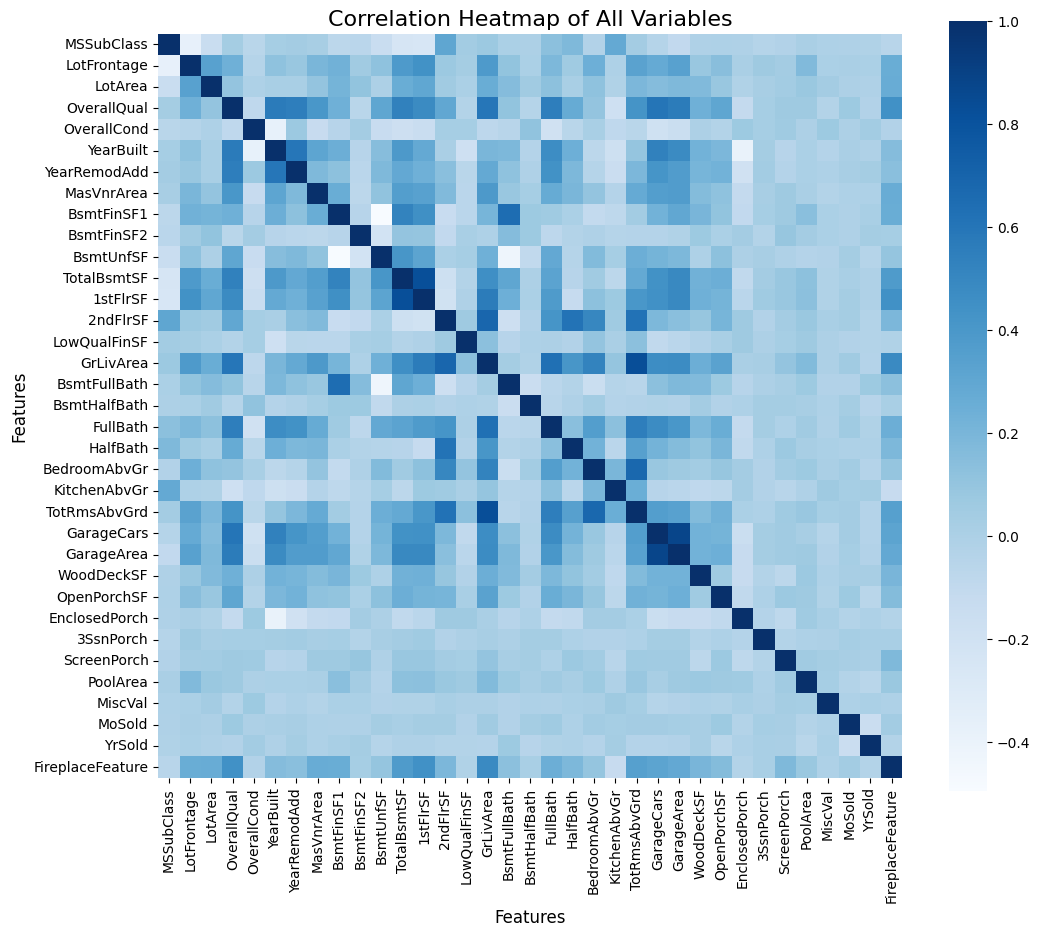

In [90]:
# Compute the correlation matrix excluding the target variable 'SalePrice'
correlation_matrix = df.drop(columns=['SalePrice']).corr(numeric_only=True)

# Set the size of the heatmap
plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn
sns.heatmap(
    correlation_matrix,
    cmap="Blues",  # Color scheme
    cbar=True,  # Show color bar
    square=True  # Make the heatmap square
)

# Add titles and labels
plt.title('Correlation Heatmap of All Variables', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show the heatmap
plt.show()

### Extract vairables with high correlation (corr > 0.7)

In [91]:
# Extract upper triangle of the correlation matrix to avoid duplicate pairs
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find variable pairs with correlation greater than 0.5
high_correlation_pairs = upper_triangle.stack().reset_index()
high_correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['Correlation'] > 0.7]

print(high_correlation_pairs)

      Variable 1    Variable 2  Correlation
319  TotalBsmtSF      1stFlrSF     0.819530
411    GrLivArea  TotRmsAbvGrd     0.825489
529   GarageCars    GarageArea     0.882475


### Variables with High Correlation

#### 1. **TotalBsmtSF and 1stFlrSF (0.819530)**

- Both represent house size attributes:

  - **TotalBsmtSF**: Includes the basement area.

  - **1stFlrSF**: Represents the first floor area.


#### 2. **GrLivArea and TotRmsAbvGrd (0.825489)**

- **GrLivArea** (Gross Living Area) already incorporates the total living area above ground.

- **TotRmsAbvGrd** is redundant and less informative.


**Decision**: Retain one of these or combine them into a new feature like **"TotalSize"** (sum of basement and first floor areas).

In [92]:
# plot the distribution of TotalBsmtSF
fig = px.histogram(train_cleaned, 
                   x='TotalBsmtSF', 
                   nbins=100, 
                   title='TotalBsmtSF Distribution',
                   labels={'TotalBsmtSF': 'Total Basement Area (sq ft)'},
                   template='plotly_white')

fig.update_traces(marker_color='blue', opacity=0.75)
fig.show()

In [93]:
# plot the distribution of 1stFlrSF
fig = px.histogram(train_cleaned,
                     x='1stFlrSF',
                     nbins=100,
                     title='1stFlrSF Distribution',
                     labels={'1stFlrSF': 'First Floor Area (sq ft)'},
                     template='plotly_white')

fig.update_traces(marker_color='blue', opacity=0.75)
fig.show()


In [94]:
# plot the distribution of 2ndFlrSF
fig = px.histogram(train_cleaned,
                     x='2ndFlrSF',
                     nbins=100,
                     title='2ndFlrSF Distribution',
                     labels={'2ndFlrSF': 'Second Floor Area (sq ft)'},
                     template='plotly_white')

fig.update_traces(marker_color='blue', opacity=0.75)
fig.show()


We will create a variable Total Size that is the sum of TotalBsmtSFn 1stFlrSF and 2ndFlrSF.

We will create two dummy variables for the presence of a second floor and basement.

In [95]:
# Combine highly correlated variables
df['TotalSize'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# create dummy is_basement
df['is_basement'] = df['TotalBsmtSF'] > 0

# create dummy is_secondfloor
df['is_secondfloor'] = df['2ndFlrSF'] > 0

In [96]:
# analyze the correlation of the new features
new_features = df[['TotalSize', 'is_basement', 'is_secondfloor', 'GrLivArea', 'TotRmsAbvGrd', 'SalePrice']]
new_features_correlation = new_features.corr()

# Create the heatmap using plotly
fig = go.Figure(data=go.Heatmap(
    z=new_features_correlation.values,
    x=new_features_correlation.columns,
    y=new_features_correlation.columns,
    colorscale='Blues'
))

fig.update_layout(
    title='Correlation Heatmap of New Features',
    xaxis_title='Features',
    yaxis_title='Features'
)

fig.show()

### Explanation and Decision

As we can observe, **TotalSize** is highly correlated with both **TotRmsAbvGrd** and **GrLivArea**, as well as with **SalePrice**. Therefore, to avoid redundancy and simplify the model, we will retain **TotalSize** as the explanatory variable for the price and remove the other two variables.

#### 3. **GarageCars and GarageArea (0.882475)**

- **GarageCars**: Represents the number of car spaces (discrete and interpretable).

- **GarageArea**: Represents the area occupied by the garage (continuous and highly 
correlated).

- **Decision**: We will combine them into a single feature, such as `GarageCapacityScore = GarageCars × GarageArea`.

In [97]:
# Create a new feature `GarageCapacityScore` combining `GarageCars` and `GarageArea`
df['GarageCapacityScore'] = df['GarageCars'] * df['GarageArea']

df[['GarageCars', 'GarageArea', 'GarageCapacityScore']].head()

,GarageCars,GarageArea,GarageCapacityScore
Id,,,
1,2,548,1096
2,2,460,920
3,2,608,1216
4,3,642,1926
5,3,836,2508


#### Dropping the columns

In [98]:
df.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'GarageCars',
                 'TotRmsAbvGrd', 'GrLivArea'], inplace=True)

#### Compute the new correlations

In [99]:
correlation_matrix = df.drop(columns=['SalePrice']).corr(numeric_only=True)

# Extract upper triangle of the correlation matrix to avoid duplicate pairs
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find variable pairs with correlation greater than 0.7
high_correlation_pairs = upper_triangle.stack().reset_index()
high_correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['Correlation'] > 0.7]

print(high_correlation_pairs)

Empty DataFrame
Columns: [Variable 1, Variable 2, Correlation]
Index: []


In [100]:
correlation_matrix = df.drop(columns=['SalePrice']).corr(numeric_only=True)

# Extract upper triangle of the correlation matrix to avoid duplicate pairs
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find variable pairs with correlation greater than 0.5
high_correlation_pairs = upper_triangle.stack().reset_index()
high_correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['Correlation'] > 0.6]

print(high_correlation_pairs)

      Variable 1    Variable 2  Correlation
114  OverallQual     TotalSize     0.668155
223   BsmtFinSF1  BsmtFullBath     0.649212


**`BsmtFinSF1` and `BsmtFullBath` (Correlation: 0.649):**

- Create a new feature that captures the usability of the finished basement: `BasementUtilityScore = BsmtFinSF1 × BsmtFullBath` to represent the total finished area of the basement.

In [101]:
# Create the `BasementUtilityScore` feature
df['BasementUtilityScore'] = df['BsmtFinSF1'] * df['BsmtFullBath']
df.drop(columns=['BsmtFinSF1', 'BsmtFullBath'], inplace=True)

We consider there is no need to create a new feature for the moderate correlation.

## Qualitative Features